## Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

import matplotlib.pyplot as plt

import scipy.ndimage as ndi

from skimage import io
from skimage.color import convert_colorspace, rgb2gray

from scripts.descriptors import descr_mean, descr_std, descr_mean_center, descr_std_center
from scripts.descr_preprocessing import get_descriptors

In [4]:
seg_5chf_filename = '5CHF_seg.jpg'
seg_1eur_filename = "1EUR_seg.jpg"

image_5chf = io.imread(f'{seg_5chf_filename}')
image_1eur = io.imread(f'{seg_1eur_filename}')


## Mean and std descriptors for several color channels

In [5]:
img_rgb_mean = descr_mean(image_5chf)
img_hsv_mean = descr_mean(convert_colorspace(image_5chf, fromspace='RGB', tospace='HSV'))
img_yuv_mean = descr_mean(convert_colorspace(image_5chf, fromspace='RGB', tospace='YUV'))

In [6]:
img_rgb_std = descr_std(image_5chf)
img_hsv_std = descr_std(convert_colorspace(image_5chf, fromspace='RGB', tospace='HSV'))
img_yuv_std = descr_std(convert_colorspace(image_5chf, fromspace='RGB', tospace='YUV'))


## Laplacian as a measure of image smoothness

In [7]:
np.mean(np.absolute(ndi.filters.laplace(image_5chf / 255.0)))

C:\Users\abour\AppData\Local\Temp\ipykernel_13284\3254191266.py:1: DeprecationWarning: Please import `laplace` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  np.mean(np.absolute(ndi.filters.laplace(image_5chf / 255.0)))


0.06667851170538416

## Mean and STD for the image's centre

## FFT experiments

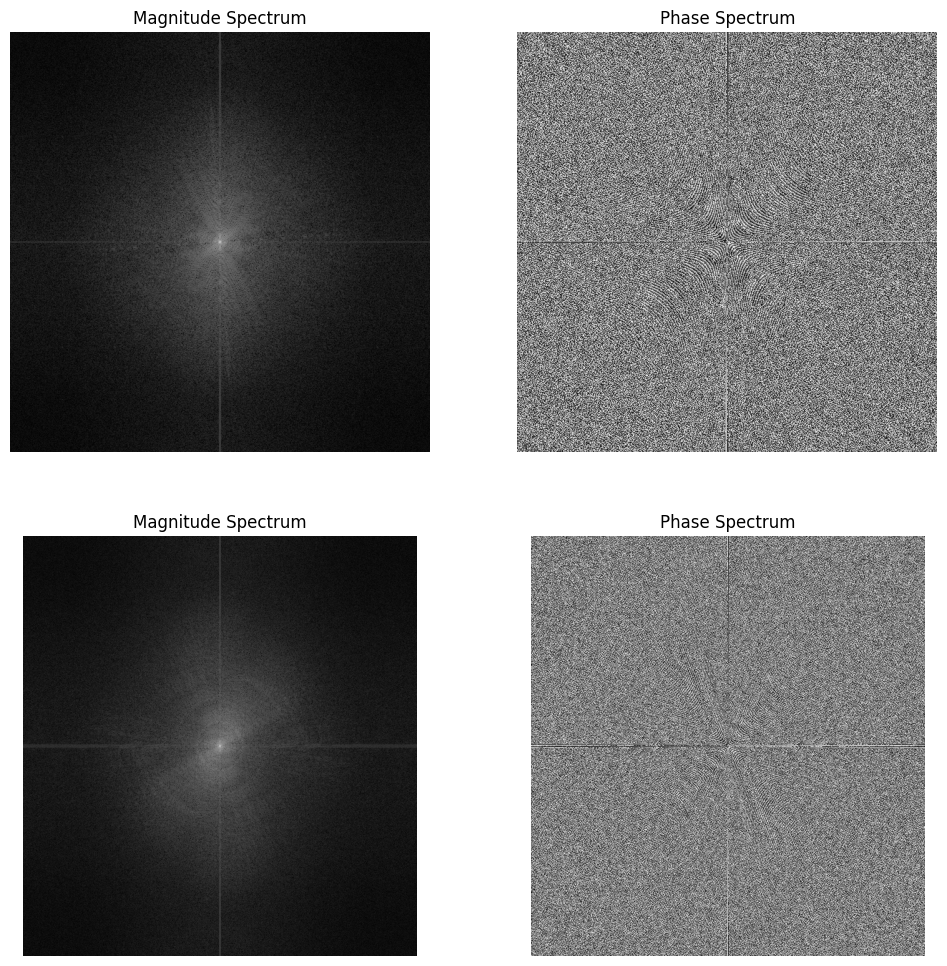

In [18]:
# Compute the 2D FFT
fft_eur = np.fft.fft2(rgb2gray(np.copy(image_1eur)))
fft_eur_shifted = np.fft.fftshift(fft_eur)
mag_eur = np.abs(fft_eur_shifted)
phi_eur = np.angle(fft_eur_shifted)

fft_chf = np.fft.fft2(rgb2gray(np.copy(image_5chf)))
fft_chf_shifted = np.fft.fftshift(fft_chf)
mag_chf = np.abs(fft_chf_shifted)
phi_chf = np.angle(fft_chf_shifted)


fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].imshow(np.log(mag_eur + 1), cmap='gray')
axes[0,0].set_title('Magnitude Spectrum')
axes[0,0].axis('off')

axes[0,1].imshow(phi_eur, cmap='gray')
axes[0,1].set_title('Phase Spectrum')
axes[0,1].axis('off')

axes[1,0].imshow(np.log(mag_chf + 1), cmap='gray')
axes[1,0].set_title('Magnitude Spectrum')
axes[1,0].axis('off')

axes[1,1].imshow(phi_chf, cmap='gray')
axes[1,1].set_title('Phase Spectrum')
axes[1,1].axis('off')


plt.show()

## Extract region to compute local mean and std

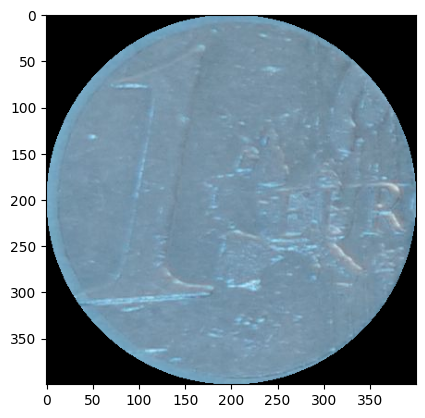

In [9]:
import cv2

from scripts.descr_preprocessing import extract_circular_region

# read image
#img = cv2.imread(seg_5chf_filename)
img = cv2.imread(seg_1eur_filename)

img_cropped = extract_circular_region(img, 200)
plt.imshow(img_cropped)

In [10]:
img.shape

(587, 587, 3)

### All in one method

In [11]:
img_rgb_mean_cropped = descr_mean_center(img, 100)
img_rgb_std_cropped = descr_std_center(img, 100)

print(f"{img_rgb_mean_cropped=}")

img_rgb_mean_cropped=(94.549425, 118.3576, 134.882775)


## Calling custom list of descriptors

In [12]:
descriptor_list = ['descr_mean', 'descr_std']

a = get_descriptors(img, descriptor_list)

In [13]:
a

{'descr_mean': (140.25861003166276, 169.66048019409754, 187.23487893571388),
 'descr_std': (35.68786821168959, 22.833793158155473, 17.14367133275876)}